# S11 T01: Practicant amb training i test sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# Exercise 1


Split the DelayedFlights.csv dataset into train and test. Study the two sets separately, at a descriptive level.

## Loading, exploring and transformation of dataset

In [2]:
df=pd.read_csv('DelayedFlights2.csv')

In [3]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
df.describe(include="all")

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,"1,936,758.00","1,936,758.00","1,936,758.00","1,936,758.00","1,936,758.00","1,936,758.00","1,936,758.00","1,929,648.00","1,936,758.00",1936758,"1,936,758.00",1936753,"1,928,371.00","1,936,560.00","1,928,371.00","1,928,371.00","1,936,758.00",1936758,1936758,"1,936,758.00","1,929,648.00","1,936,303.00","1,936,758.00",1936758,"1,936,758.00","1,247,488.00","1,247,488.00","1,247,488.00","1,247,488.00","1,247,488.00"
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,5366,NaN,NaN,NaN,NaN,NaN,303,304,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,N325SW,NaN,NaN,NaN,NaN,NaN,ATL,ORD,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,NaN,965,NaN,NaN,NaN,NaN,NaN,131613,108984,NaN,NaN,NaN,NaN,1936125,NaN,NaN,NaN,NaN,NaN,NaN
mean,"3,341,651.15","2,008.00",6.11,15.75,3.98,"1,518.53","1,467.47","1,610.14","1,634.22",NaN,"2,184.26",NaN,133.31,134.30,108.28,42.20,43.19,NaN,NaN,765.69,6.81,18.23,0.00,NaN,0.00,19.18,3.70,15.02,0.09,25.30
std,"2,066,064.96",0.00,3.48,8.78,2.00,450.49,424.77,548.18,464.63,NaN,"1,944.70",NaN,72.06,71.34,68.64,56.78,53.40,NaN,NaN,574.48,5.27,14.34,0.02,NaN,0.06,43.55,21.49,33.83,2.02,42.05
min,0.00,"2,008.00",1.00,1.00,1.00,1.00,0.00,1.00,0.00,NaN,1.00,NaN,14.00,-25.00,0.00,-109.00,6.00,NaN,NaN,11.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,517,452.50","2,008.00",3.00,8.00,2.00,"1,203.00","1,135.00","1,316.00","1,325.00",NaN,610.00,NaN,80.00,82.00,58.00,9.00,12.00,NaN,NaN,338.00,4.00,10.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,242,558.00","2,008.00",6.00,16.00,4.00,"1,545.00","1,510.00","1,715.00","1,705.00",NaN,"1,543.00",NaN,116.00,116.00,90.00,24.00,24.00,NaN,NaN,606.00,6.00,14.00,0.00,NaN,0.00,2.00,0.00,2.00,0.00,8.00
75%,"4,972,466.75","2,008.00",9.00,23.00,6.00,"1,900.00","1,815.00","2,030.00","2,014.00",NaN,"3,422.00",NaN,165.00,165.00,137.00,56.00,53.00,NaN,NaN,998.00,8.00,21.00,0.00,NaN,0.00,21.00,0.00,15.00,0.00,33.00


In [6]:
# Looking for duplicated

df.duplicated().sum()

0

In [7]:
# Looking for Nan

df.isna().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [8]:
# Numeric features

num_columns = list(df.select_dtypes('number').columns)
print(f"Numerical columns are: {num_columns}")



Numerical columns are: ['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [9]:
# Categorical features 

cat_columns = list(df.select_dtypes(exclude=['number']).columns)
print (f"Categorical columns are: {cat_columns}")

Categorical columns are: ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']


In [10]:
# Crating another column Departure Date

df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')


In [11]:
# Crating another column Velocity

df['Vel']= df['Distance'] / (df['AirTime']/60) 

In [12]:
# Dropping some unnecessary columns

var= ['Unnamed: 0', 'Year','CRSDepTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'TailNum','CRSElapsedTime', 'TaxiIn', 'TaxiOut','CancellationCode']

In [13]:
df=df.drop(columns=var)

In [14]:
# Categorising some columns

col=['Month','DayofMonth','DayOfWeek','UniqueCarrier','Origin','Dest']

In [15]:
df[col] = df[col].astype('category',copy=False)

In [16]:
print(df.dtypes)

Month                      category
DayofMonth                 category
DayOfWeek                  category
DepTime                     float64
ArrTime                     float64
UniqueCarrier              category
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                     category
Dest                       category
Distance                      int64
Cancelled                     int64
Diverted                      int64
CarrierDelay                float64
WeatherDelay                float64
NASDelay                    float64
SecurityDelay               float64
LateAircraftDelay           float64
DepDate              datetime64[ns]
Vel                         float64
dtype: object


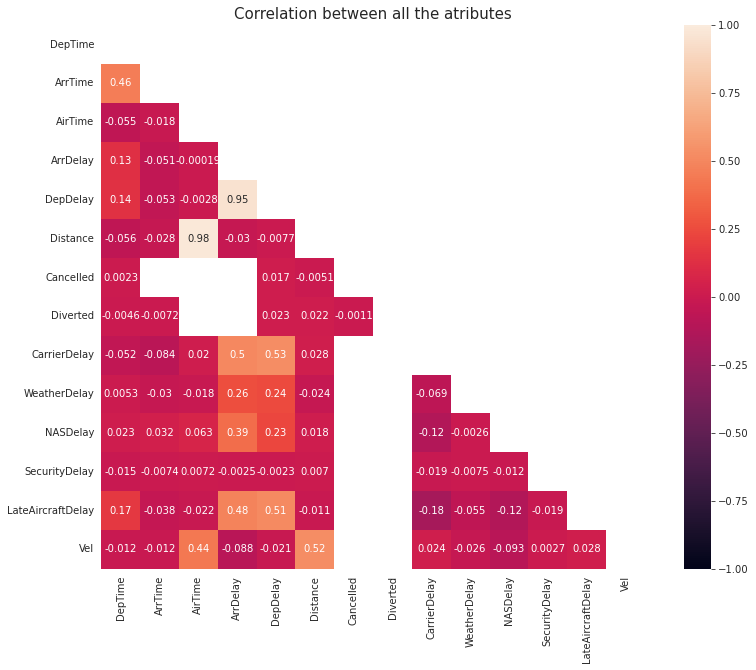

In [17]:
# Creating a correlation heatmap with the numercial variables

corr = df.loc[:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, square=True)
    
plt.title('Correlation between all the atributes',fontsize=15)
plt.show()

We see that there are some features, like Cancelled or Diverted, with no relationship with ArrDelay, which is our target feature. So we can drop them, as well.

In [18]:
# Checking Cancelled and Diverted variables

df['Cancelled'].value_counts()


0    1936125
1        633
Name: Cancelled, dtype: int64

In [19]:
df.drop(df[df['Cancelled'] > 0].index, inplace = True)

In [20]:
df['Cancelled'].value_counts()

0    1936125
Name: Cancelled, dtype: int64

In [21]:
df['Diverted'].value_counts()

0    1928371
1       7754
Name: Diverted, dtype: int64

In [22]:
df.drop(df[df['Diverted'] > 0].index, inplace = True)

In [23]:
df['Diverted'].value_counts()

0    1928371
Name: Diverted, dtype: int64

In [24]:
# Dropping some variables we don't need for our analysis

var2=['Diverted','Cancelled','Origin','Dest','UniqueCarrier','DepDate']
df=df.drop(columns=var2)

In [25]:
# Checking again for Nan

df.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
ArrTime                   0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Distance                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
Vel                       0
dtype: int64

In [26]:
# Filling Nan with zeros

fill=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [27]:
df[fill]=df[fill].fillna(0)

In [28]:
df.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
ArrTime              0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Vel                  0
dtype: int64

In [29]:
# Statistical analysis after transformations

In [30]:
df.describe()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Vel
count,"1,928,371.00","1,928,371.00","1,928,371.00","1,928,371.00","1,928,371.00","1,928,371.00","1,928,371.00","1,928,371.00","1,928,371.00","1,928,371.00","1,928,371.00","1,928,371.00"
mean,"1,518.65","1,610.24",108.28,42.20,43.09,764.95,12.41,2.40,9.72,0.06,16.36,inf
std,450.44,548.00,68.64,56.78,53.27,573.89,36.20,17.38,28.14,1.63,35.92,NaN
min,1.00,1.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,21.29
25%,"1,203.00","1,316.00",58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00,351.86
50%,"1,545.00","1,715.00",90.00,24.00,24.00,606.00,0.00,0.00,0.00,0.00,0.00,403.82
75%,"1,900.00","2,030.00",137.00,56.00,53.00,997.00,10.00,0.00,6.00,0.00,18.00,448.15
max,"2,400.00","2,400.00","1,091.00","2,461.00","2,467.00","4,962.00","2,436.00","1,352.00","1,357.00",392.00,"1,316.00",inf


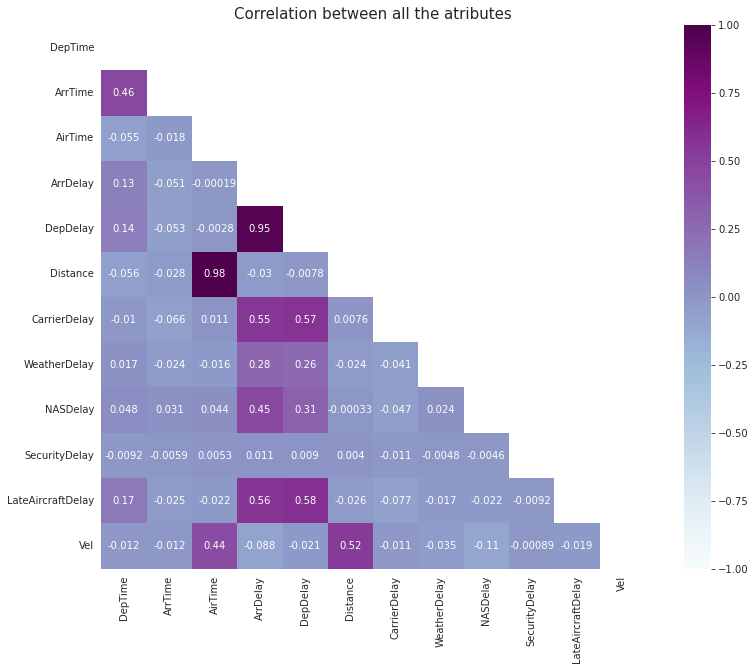

In [31]:
# Creating a correlation heatmap with the numercial variables after transformation

corr = df.loc[:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('whitegrid'):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, square=True, cmap="BuPu")
    
plt.title('Correlation between all the atributes',fontsize=15)
plt.show()

ArrDelay, our target feature, is strongly correlated with DepDelay, LateAircraftDelay, CarrierDelay.

## Exercise 2


Apply some transformation process (standardize numerical data, create dummy columns, polynomials ...).

In [32]:
# Making a copy of dataset for further transformation and analysis

df2=df.copy()

In [33]:
# Checking again for Nan. Machine learning don't tolerate Nan, so we have removed all of them.

df2.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
ArrTime              0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Vel                  0
dtype: int64

In [34]:
# Since we are practising training and testing sets, we just need a sample big enought, but not all the set.

df3=df2.sample(50000)

In [35]:
df3.describe()

,DepTime,ArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Vel
count,"50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00"
mean,"1,515.99","1,610.85",107.97,42.26,43.01,761.98,12.31,2.40,9.88,0.06,16.33,396.22
std,451.62,544.98,68.81,56.45,52.88,575.45,35.78,17.01,28.75,1.64,35.94,77.26
min,1.00,1.00,4.00,-54.00,6.00,31.00,0.00,0.00,0.00,0.00,0.00,60.75
25%,"1,201.00","1,315.00",58.00,9.00,12.00,337.00,0.00,0.00,0.00,0.00,0.00,351.22
50%,"1,543.00","1,714.00",90.00,25.00,24.00,604.00,0.00,0.00,0.00,0.00,0.00,403.55
75%,"1,859.00","2,030.00",137.00,56.00,53.00,992.00,10.00,0.00,6.00,0.00,18.00,447.69
max,"2,400.00","2,400.00",636.00,"1,707.00","1,710.00","4,962.00","1,707.00",710.00,806.00,141.00,"1,002.00","2,050.59"


In [36]:
# Sorting labels

sorted(df3)

['AirTime',
 'ArrDelay',
 'ArrTime',
 'CarrierDelay',
 'DayOfWeek',
 'DayofMonth',
 'DepDelay',
 'DepTime',
 'Distance',
 'LateAircraftDelay',
 'Month',
 'NASDelay',
 'SecurityDelay',
 'Vel',
 'WeatherDelay']

In [37]:
df4=df3[['AirTime',
 'ArrDelay',
 'ArrTime',
 'CarrierDelay',
 'DayOfWeek',
 'DayofMonth',
 'DepDelay',
 'DepTime',
 'Distance',
 'LateAircraftDelay',
 'Month',
 'NASDelay',
 'SecurityDelay',
 'Vel',
 'WeatherDelay']]

In [38]:
# Applying RobustScale

from pandas.plotting import scatter_matrix
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler

# Perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(df4)


To ease Machine Learning to work smothly, we preprocess the dataset scaling features using statistics that are robust to outliers.This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [39]:
data

array([[-0.72151899, -0.4893617 , -0.26853147, ...,  0.        ,
        -1.65753252,  0.        ],
       [ 0.39240506,  0.14893617,  0.57062937, ...,  0.        ,
        -0.73408051,  0.        ],
       [ 2.01265823, -0.14893617,  0.18041958, ...,  0.        ,
         0.18051616,  0.        ],
       ...,
       [ 0.5443038 ,  0.61702128, -0.22377622, ...,  0.        ,
         0.29210323,  0.        ],
       [-0.30379747, -0.23404255, -0.95664336, ...,  0.        ,
        -1.0638848 ,  0.        ],
       [-0.51898734,  1.0212766 ,  0.12167832, ...,  0.        ,
        -0.34985371,  0.        ]])

In [40]:
# Convert the array back to a dataframe

df5 = DataFrame(data)
df5.columns=['AirTime',
 'ArrDelay',
 'ArrTime',
 'CarrierDelay',
 'DayOfWeek',
 'DayofMonth',
 'DepDelay',
 'DepTime',
 'Distance',
 'LateAircraftDelay',
 'Month',
 'NASDelay',
 'SecurityDelay',
 'Vel',
 'WeatherDelay']
# summarize
print(df5.describe())


        AirTime  ArrDelay   ArrTime  CarrierDelay  DayOfWeek  DayofMonth  \
count 50,000.00 50,000.00 50,000.00     50,000.00  50,000.00   50,000.00   
mean       0.23      0.37     -0.14          1.23      -0.01       -0.01   
std        0.87      1.20      0.76          3.58       0.50        0.58   
min       -1.09     -1.68     -2.40          0.00      -0.75       -1.00   
25%       -0.41     -0.34     -0.56          0.00      -0.50       -0.53   
50%        0.00      0.00      0.00          0.00       0.00        0.00   
75%        0.59      0.66      0.44          1.00       0.50        0.47   
max        6.91     35.79      0.96        170.70       0.75        1.00   

       DepDelay   DepTime  Distance  LateAircraftDelay     Month  NASDelay  \
count 50,000.00 50,000.00 50,000.00          50,000.00 50,000.00 50,000.00   
mean       0.46     -0.04      0.24               0.91      0.01      1.65   
std        1.29      0.69      0.88               2.00      0.58      4.79   
min

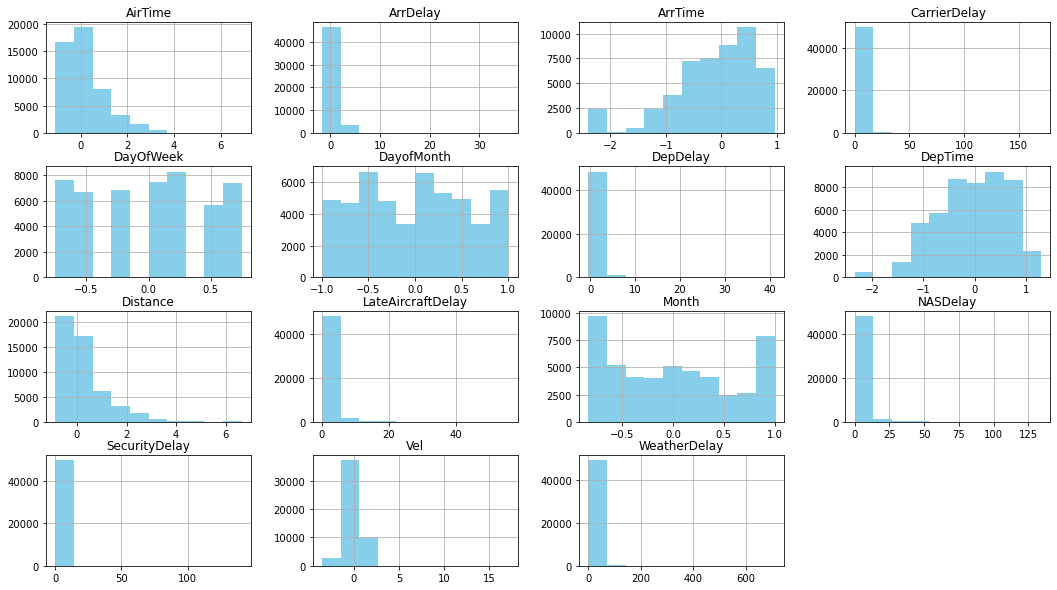

<Figure size 2160x1080 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt 
plt.rc('figure', figsize=(18, 10))
# histograms of the variables

df5.hist(color = "skyblue")
plt.figure(figsize=(30,15))
plt.show()

We have applied RobustScale, but we will test as well PowerTransformer to make data more Gaussian-like.

[-2.10215666e-02  6.74125304e-01  1.40050360e+00 -7.10063824e-01
  7.22359559e-01  7.47220169e-01 -2.35243777e-01  1.27476524e+00
  1.04779074e-01 -5.60774835e-01  5.04161275e-01 -7.86591289e-01
 -1.13443221e+02  1.16986837e+00 -5.81061833e+00]
        AirTime  ArrDelay   ArrTime  CarrierDelay  DayOfWeek  DayofMonth  \
count 50,000.00 50,000.00 50,000.00     50,000.00  50,000.00   50,000.00   
mean      -0.00      0.00     -0.00          0.00      -0.00        0.00   
std        1.00      1.00      1.00          1.00       1.00        1.00   
min       -5.00    -10.56     -2.42         -0.71      -1.57       -1.89   
25%       -0.72     -0.54     -0.66         -0.71      -0.97       -0.84   
50%        0.00     -0.14      0.13         -0.71       0.07        0.10   
75%        0.70      0.45      0.81          1.30       1.00        0.83   
max        3.19     13.23      1.66          1.73       1.44        1.60   

       DepDelay   DepTime  Distance  LateAircraftDelay     Month  NASD

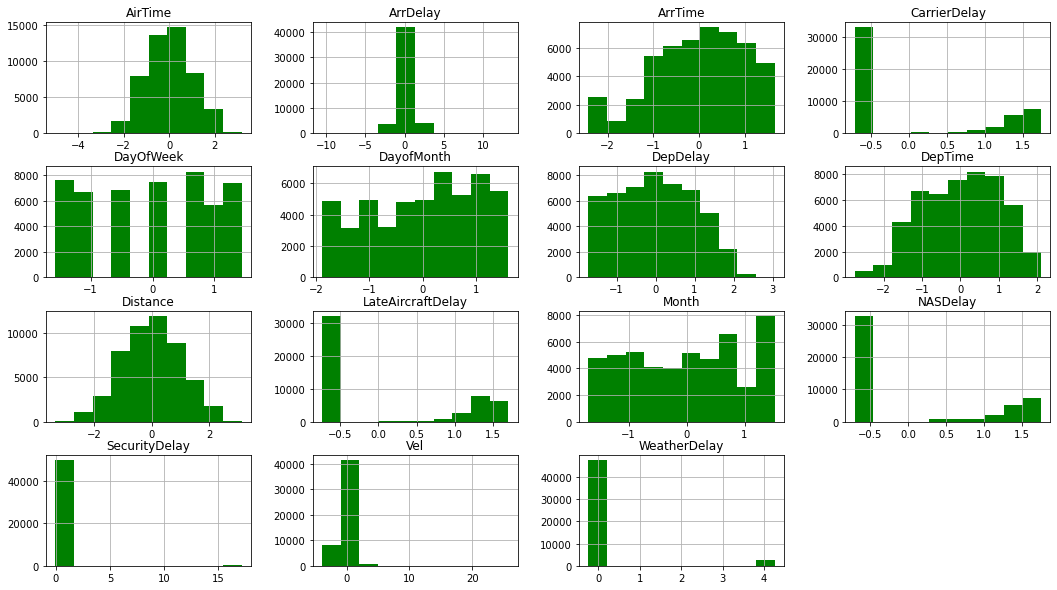

In [42]:
# Applying PowerTransformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df4)
PowerTransformer()
print(pt.lambdas_)

df6= pt.transform(df4)
df7= DataFrame(df6)
df7.columns =['AirTime',
 'ArrDelay',
 'ArrTime',
 'CarrierDelay',
 'DayOfWeek',
 'DayofMonth',
 'DepDelay',
 'DepTime',
 'Distance',
 'LateAircraftDelay',
 'Month',
 'NASDelay',
 'SecurityDelay',
 'Vel',
 'WeatherDelay']

print(df7.describe())
# histograms of the variables
df7.hist(color='g')
plt.show()


After applying PowerTransformer data is more like Gaussian.

## Applying Test and Train Split

In [43]:
# Selectin variables

y = df7["ArrDelay"]


In [44]:
x=df7.drop("ArrDelay",axis=1)

In [45]:
X=x.copy()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
X_train

,AirTime,ArrTime,CarrierDelay,DayOfWeek,DayofMonth,DepDelay,DepTime,Distance,LateAircraftDelay,Month,NASDelay,SecurityDelay,Vel,WeatherDelay
23990,-1.26,0.58,1.61,-0.97,1.13,1.27,0.69,-1.07,1.26,-1.23,-0.71,-0.06,-0.37,-0.23
8729,1.14,-1.16,-0.71,1.44,0.83,-1.19,-1.52,0.90,-0.74,-0.84,-0.71,-0.06,-0.15,-0.23
3451,-0.17,-0.00,-0.71,-0.97,1.51,1.46,-0.04,-0.77,1.57,1.52,-0.71,-0.06,-1.93,-0.23
2628,-1.04,-0.24,-0.71,-0.97,-1.11,-1.35,-0.23,-0.87,-0.74,-0.18,-0.71,-0.06,-0.23,-0.23
38352,-0.44,0.10,1.54,0.55,-0.12,0.65,-0.01,-0.22,-0.74,-0.84,-0.71,-0.06,0.58,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.39,-0.05,1.06,0.55,1.03,0.22,-0.06,-0.39,1.30,-0.49,-0.71,-0.06,-0.27,-0.23
44732,0.75,-0.08,-0.71,-0.43,0.93,1.69,-0.46,0.73,-0.74,1.52,1.72,-0.06,0.46,-0.23
38158,-2.19,1.05,-0.71,0.07,0.73,1.32,1.35,-2.51,-0.74,-0.18,-0.71,-0.06,-2.67,4.26
860,1.03,-0.45,-0.71,-0.43,0.83,-1.35,-0.93,0.79,-0.74,-1.69,-0.71,-0.06,-0.21,-0.23


In [48]:
y_train

23990    0.81
8729    -0.67
3451     1.28
2628    -0.96
38352    0.01
         ... 
11284   -0.14
44732    1.75
38158    1.06
860     -0.54
15795   -0.12
Name: ArrDelay, Length: 33500, dtype: float64

In [49]:
X_test

,AirTime,ArrTime,CarrierDelay,DayOfWeek,DayofMonth,DepDelay,DepTime,Distance,LateAircraftDelay,Month,NASDelay,SecurityDelay,Vel,WeatherDelay
33553,0.66,0.17,-0.71,0.07,0.63,-0.56,-0.31,0.54,-0.74,0.63,-0.71,-0.06,0.02,-0.23
9427,-0.46,0.59,-0.71,-0.43,0.83,1.60,0.48,-0.82,-0.74,-1.69,1.73,-0.06,-1.50,-0.23
199,1.06,-0.97,-0.71,-0.43,-0.12,0.07,-1.87,1.22,-0.74,-0.18,1.61,-0.06,1.43,-0.23
12447,0.66,1.43,1.55,-1.57,-0.12,0.57,1.19,0.71,-0.74,-0.49,-0.71,-0.06,0.73,-0.23
39489,1.84,-2.36,-0.71,0.55,-0.24,0.82,0.44,1.91,1.48,0.11,-0.71,-0.06,1.35,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27615,-0.26,1.07,-0.71,0.55,-0.12,1.51,1.39,-0.40,1.58,1.31,-0.71,-0.06,-0.67,-0.23
21964,1.40,1.24,-0.71,1.44,0.52,0.29,1.43,1.44,-0.74,0.38,-0.71,-0.06,1.08,4.26
33321,0.95,0.31,-0.71,1.00,1.32,-1.52,0.15,0.71,-0.74,0.11,-0.71,-0.06,-0.25,-0.23
40225,0.13,-1.20,1.67,0.07,1.22,1.68,-1.32,0.16,-0.74,1.31,-0.71,-0.06,0.26,-0.23


In [50]:
y_test

33553   -1.14
9427     2.44
199      0.01
12447    0.05
39489    0.42
         ... 
27615    1.36
21964   -0.35
33321   -0.70
40225    1.55
28203   -0.12
Name: ArrDelay, Length: 16500, dtype: float64

## Exercise 3


Summarise the new statistically and graphically generated columns

        AirTime   ArrTime  CarrierDelay  DayOfWeek  DayofMonth  DepDelay  \
count 33,500.00 33,500.00     33,500.00  33,500.00   33,500.00 33,500.00   
mean      -0.00      0.00         -0.01      -0.00       -0.00     -0.00   
std        1.00      1.00          1.00       1.00        1.00      1.00   
min       -4.17     -2.42         -0.71      -1.57       -1.89     -1.72   
25%       -0.72     -0.66         -0.71      -0.97       -0.84     -0.83   
50%        0.00      0.13         -0.71       0.07        0.10     -0.02   
75%        0.70      0.80          1.30       1.00        0.83      0.79   
max        3.19      1.66          1.73       1.44        1.60      2.88   

        DepTime  Distance  LateAircraftDelay     Month  NASDelay  \
count 33,500.00 33,500.00          33,500.00 33,500.00 33,500.00   
mean      -0.00     -0.00              -0.00      0.00     -0.01   
std        1.00      1.01               1.00      1.00      1.00   
min       -2.75     -3.36              -0.7

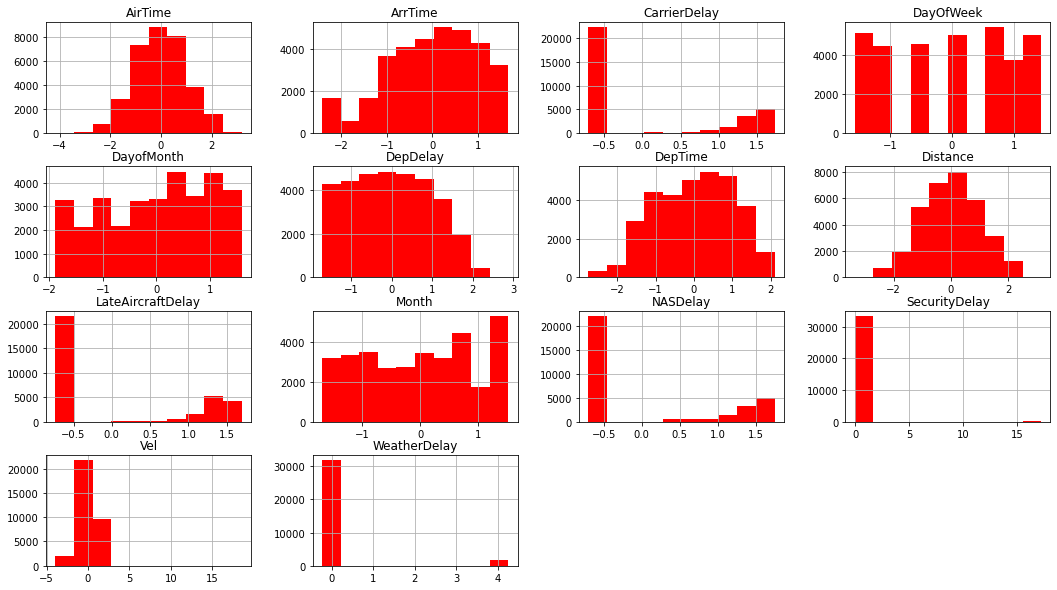

In [51]:
print(X_train.describe())
# histograms of the variables
X_train.hist(color='r')
plt.show()

count   33,500.00
mean        -0.00
std          1.01
min         -8.95
25%         -0.54
50%         -0.16
75%          0.45
max          9.93
Name: ArrDelay, dtype: float64


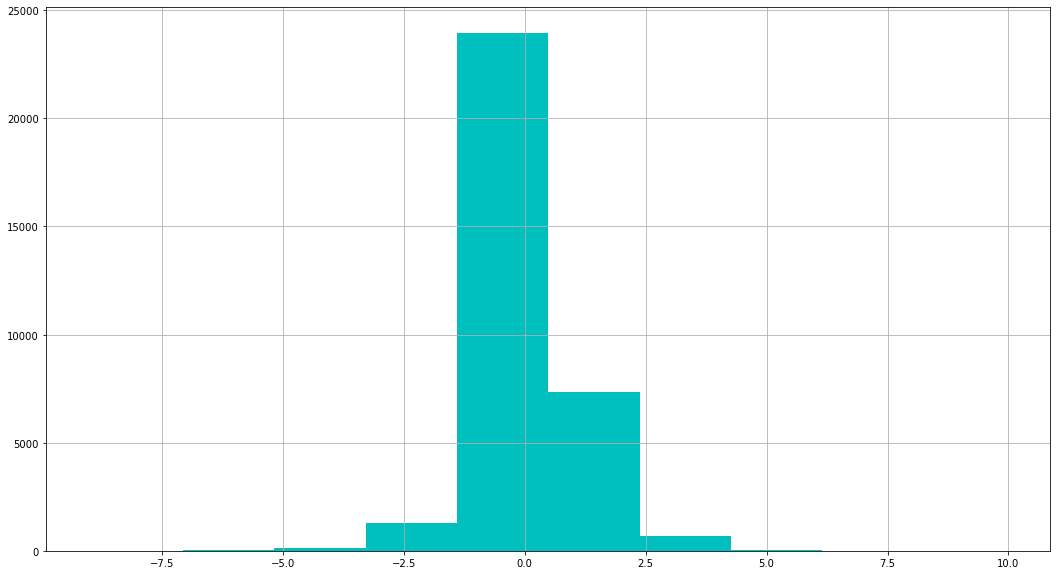

In [52]:
print(y_train.describe())
# histograms of the variables
y_train.hist(color='c')
plt.show()

        AirTime   ArrTime  CarrierDelay  DayOfWeek  DayofMonth  DepDelay  \
count 16,500.00 16,500.00     16,500.00  16,500.00   16,500.00 16,500.00   
mean       0.00     -0.00          0.01       0.00        0.01      0.00   
std        0.99      1.01          1.00       0.99        1.00      1.00   
min       -5.00     -2.42         -0.71      -1.57       -1.89     -1.72   
25%       -0.72     -0.67         -0.71      -0.97       -0.84     -0.83   
50%        0.00      0.12         -0.71       0.07        0.10     -0.02   
75%        0.70      0.81          1.30       1.00        0.83      0.79   
max        3.07      1.66          1.73       1.44        1.60      3.06   

        DepTime  Distance  LateAircraftDelay     Month  NASDelay  \
count 16,500.00 16,500.00          16,500.00 16,500.00 16,500.00   
mean       0.00      0.00               0.01     -0.01      0.01   
std        1.00      0.99               1.00      1.00      1.00   
min       -2.75     -3.36              -0.7

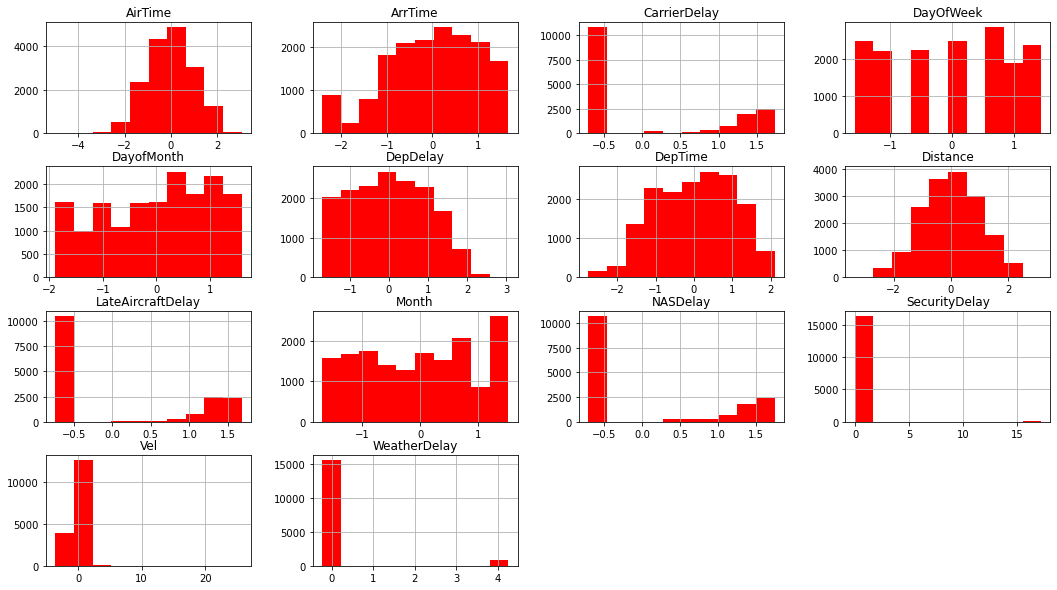

In [53]:
print(X_test.describe())
# histograms of the variables
X_test.hist(color='r')
plt.show()

count   16,500.00
mean         0.01
std          0.98
min        -10.56
25%         -0.54
50%         -0.14
75%          0.45
max         13.23
Name: ArrDelay, dtype: float64


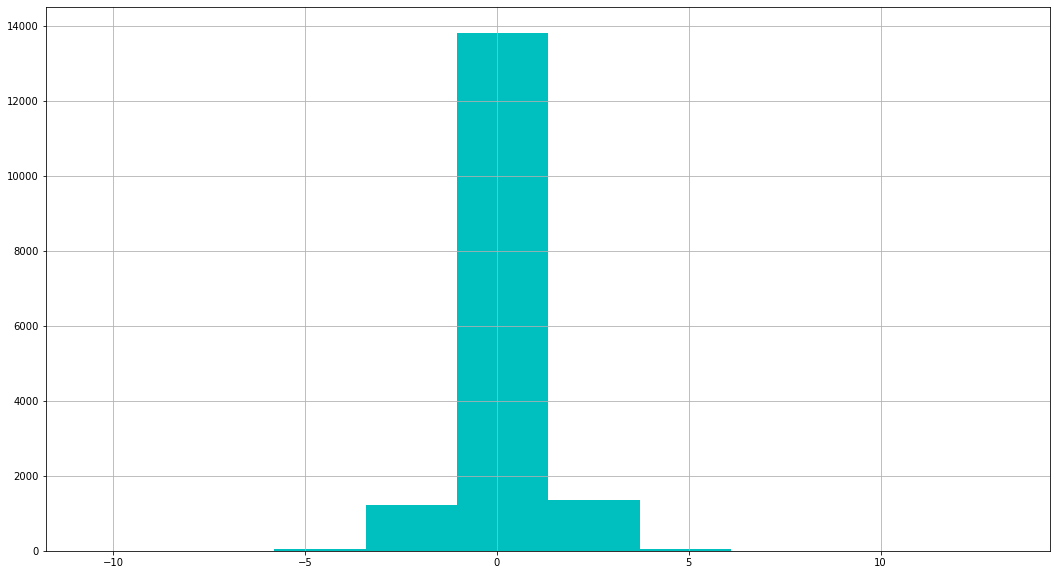

In [54]:
print(y_test.describe())
# histograms of the variables
y_test.hist(color='c')
plt.show()

## Conclusion

After spliting the dataset in training and testing (33%) we can see that statistically are similar with a mean of 0 and a standard deviation of 1, thus apt to work well in Machine Learning.